In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [2]:
train = pd.read_csv('/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/diabetes_train.csv')
test = pd.read_csv('/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/diabetes_test.csv')

Statsmodels

In [4]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,88,74,19,53,29.0,0.229,22,0
1,2,129,84,0,0,28.0,0.284,27,0
2,0,102,78,40,90,34.5,0.238,24,0
3,0,123,72,0,0,36.3,0.258,52,1
4,1,144,82,46,180,46.1,0.335,46,1


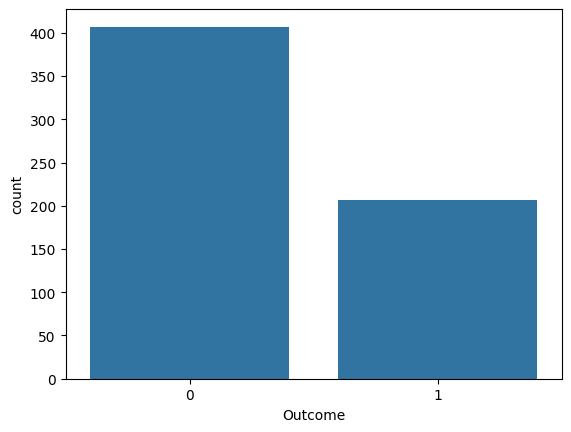

In [6]:
train.Outcome.value_counts()
sns.countplot(x = 'Outcome',data = train);


Scikit Learn

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Separate features and target variable
x_train = train.drop(['Outcome'], axis=1)
y_train = train[['Outcome']].values.ravel()  # Convert y_train to 1D

x_test = test.drop(['Outcome'], axis=1)
y_test = test[['Outcome']].values.ravel()  

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the model with more iterations
skn_model = LogisticRegression(penalty=None, solver="saga", max_iter=1000)
skn_model.fit(x_train_scaled, y_train)

# Predict using scaled test data
y_pred_test = skn_model.predict(x_test_scaled)  
y_pred_probs = skn_model.predict_proba(x_test_scaled)

print(y_pred_probs[:5])  # First 5 predicted probabilities


[[0.2804285  0.7195715 ]
 [0.34685357 0.65314643]
 [0.76283839 0.23716161]
 [0.66008134 0.33991866]
 [0.26355553 0.73644447]]


In [34]:
feature_names = x_train.columns  # Get feature names from DataFrame

# Create a dictionary mapping feature names to coefficients
coef_dict = dict(zip(feature_names, coefficients))

print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")  # Limit to 4 decimal places


Intercept: -0.9187259986017957
Coefficients:
Pregnancies: 0.3286
Glucose: 1.0318
BloodPressure: -0.2435
SkinThickness: 0.0024
Insulin: -0.2003
BMI: 0.7308
DiabetesPedigreeFunction: 0.2778
Age: 0.2662


Text(0.5, 23.52222222222222, 'Predicted Values')

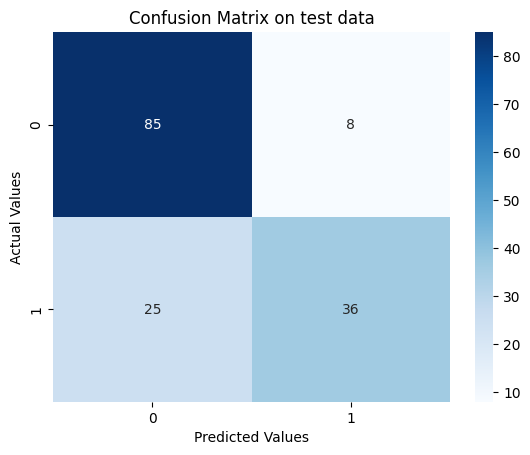

In [35]:
cm=confusion_matrix(y_test,y_pred_test)
#plt.figure(figsize=(4,4))
plt.title("Confusion Matrix on test data")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [36]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_test))
from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred_test))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred_test))
from sklearn.metrics import f1_score
print("F1 score:",  f1_score(y_test, y_pred_test))

Accuracy: 0.7857142857142857
Precision: 0.8181818181818182
Recall: 0.5901639344262295
F1 score: 0.6857142857142857


Statsmodels

In [40]:
import statsmodels.api as sm  # Use statsmodels.api, not formula.api
from sklearn.preprocessing import StandardScaler

# Define independent (X) and dependent (y) variables
X_train = train.drop(['Outcome'], axis=1)
y_train = train['Outcome']  # Convert to 1D array

# Standardize features (to match Sklearn)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add intercept (constant term) to X_train
X_train_scaled = sm.add_constant(X_train_scaled)  # Correct usage!

# Fit logistic regression model using Statsmodels
model = sm.Logit(y_train, X_train_scaled).fit()

# Print model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.478977
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Thu, 13 Feb 2025   Pseudo R-squ.:                  0.2506
Time:                        14:17:54   Log-Likelihood:                -294.09
converged:                       True   LL-Null:                       -392.42
Covariance Type:            nonrobust   LLR p-value:                 3.243e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9187      0.108     -8.535      0.000      -1.130      -0.708
x1             0.3286      0.

In [24]:
# Predicted probabilities
predicted_probabilities = model.predict(train)
predicted_probabilities

0      0.050618
1      0.174902
2      0.098656
3      0.382483
4      0.671876
         ...   
609    0.454924
610    0.437998
611    0.061539
612    0.438269
613    0.210095
Length: 614, dtype: float64

In [38]:
# Predicted classes (binary outcome, 0 or 1)
predicted_classes = (predicted_probabilities > 0.5).astype(int)
predicted_classes

0      0
1      0
2      0
3      0
4      1
      ..
609    0
610    0
611    0
612    0
613    0
Length: 614, dtype: int64

Classification accuracy = 77.9%


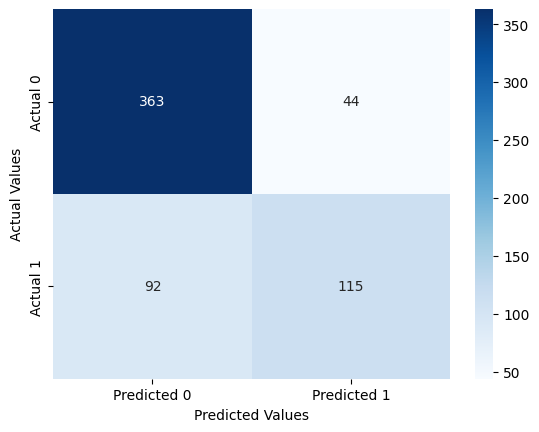

In [26]:
#Function to compute confusion matrix and prediction accuracy on training data
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

cm = confusion_matrix_train(model)
